<a href="https://colab.research.google.com/github/sudama-inc/Machine-Learning-Regression-Models/blob/main/mlRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [106]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [157]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
from IPython.display import display

import pickle

In [19]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

In [20]:
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.shape

(1338, 7)

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [79]:
df.skew()

age                 0.055673
bmi                 0.284047
children            0.938380
charges             1.515880
sex_male           -0.020951
smoker_yes          1.464766
region_northwest    1.200409
region_southeast    1.025621
region_southwest    1.200409
dtype: float64

In [80]:
df.kurtosis()

age                -1.245088
bmi                -0.050732
children            0.202454
charges             1.606299
sex_male           -2.002557
smoker_yes          0.145756
region_northwest   -0.559857
region_southeast   -0.949523
region_southwest   -0.559857
dtype: float64

Unique Value

In [24]:
# Find Unique Values

{col:list(df[col].unique()) for col in df.select_dtypes("object")}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [38]:
# In Data Analysis What All Things We Do

    # Missing Values
    # Explore About the Numerical Variables
    # Explore About categorical Variables
    # Finding Relationship between features

In [39]:
# Find Null Values in DataSet

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

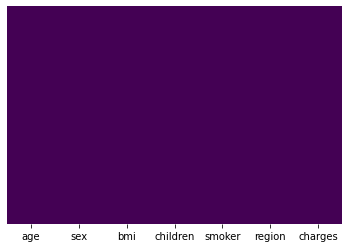

In [41]:
# There is no Null values in the dataset

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Correlation with Discrete Features**

In [30]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


**Correlation Heat Map with Discrete Features**


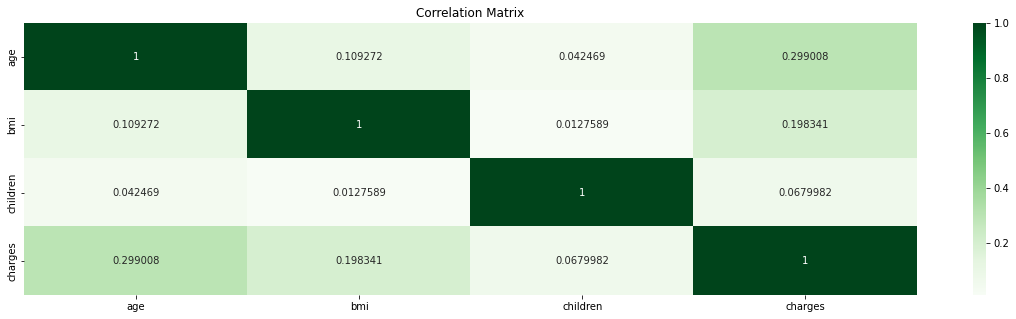

In [29]:
fig,ax= plt.subplots(1,1,figsize = (20,5))

_ = ax.set_title("Correlation Matrix")
_ = sns.heatmap(df.corr(),annot=True,fmt="g",cmap="Greens")

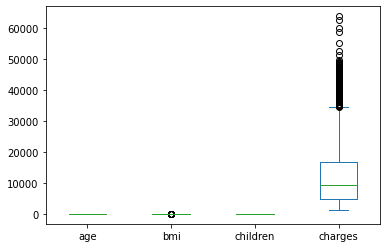

In [44]:
# Box Plot

df.plot.box()

In [33]:
charges_range = df["charges"].apply(lambda x: "severe" if x>17000 else "light")
charges_range

0        light
1        light
2        light
3       severe
4        light
         ...  
1333     light
1334     light
1335     light
1336     light
1337    severe
Name: charges, Length: 1338, dtype: object

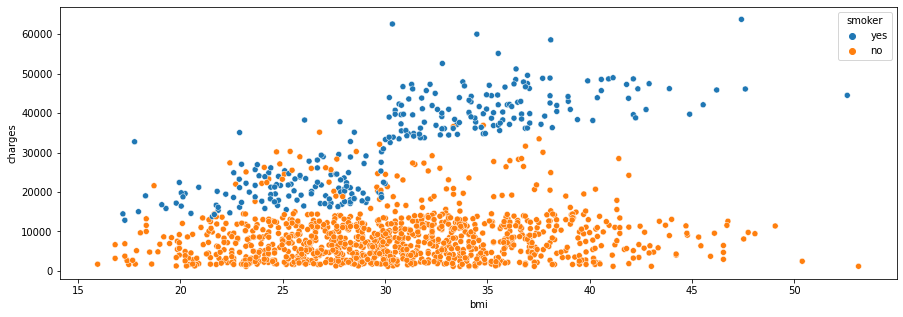

In [48]:
fig = plt.subplots(1,1,figsize = (15,5))
_ = sns.scatterplot(data = df,x = "bmi",y = "charges",hue = "smoker")

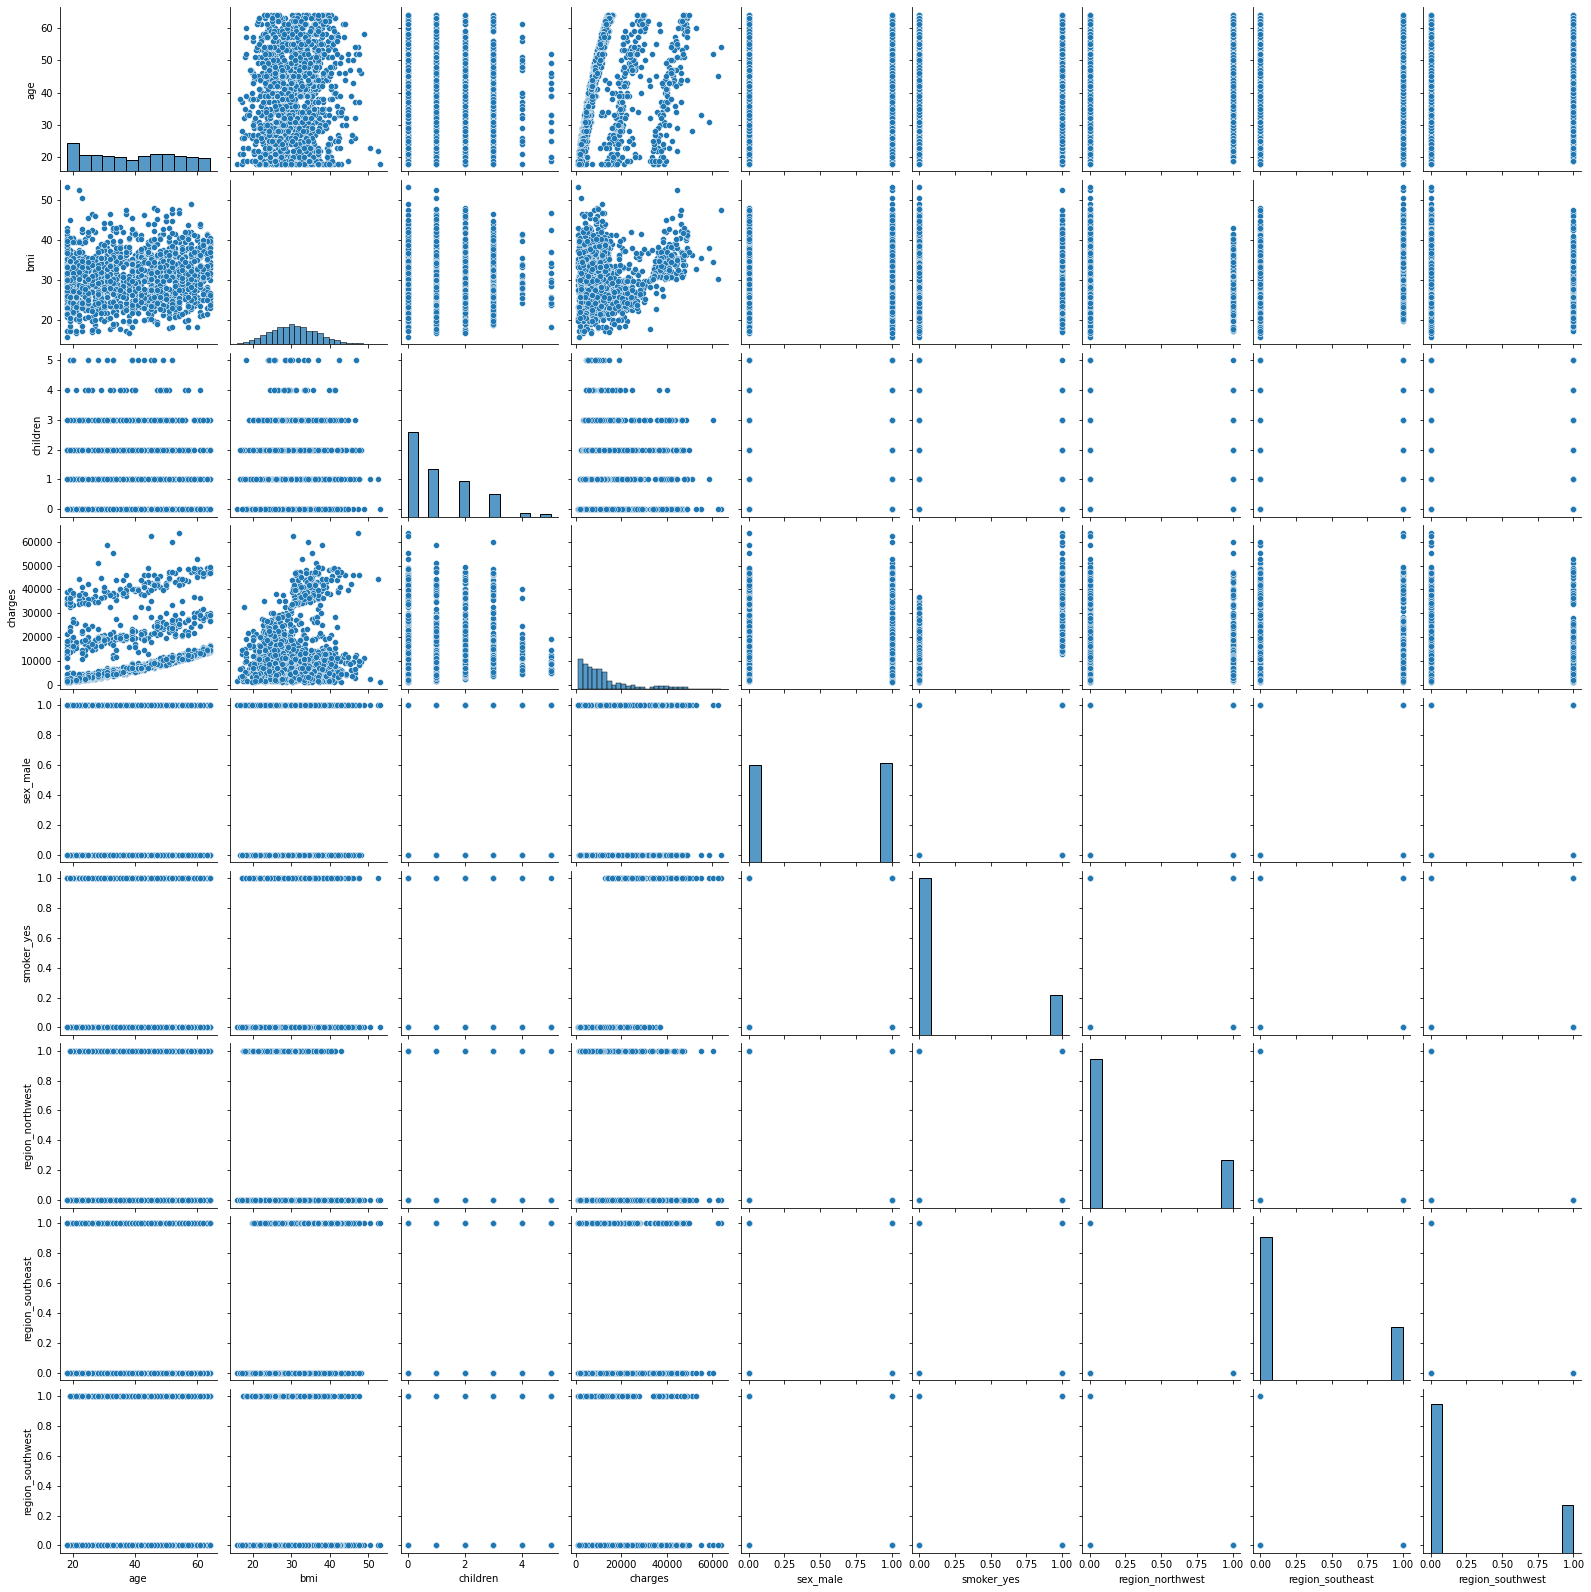

In [82]:
# Try Pair Plot with Discrete Features

sns.pairplot(data = df)
plt.show()    # to show

In [60]:
for col in df.select_dtypes("object"):
  print(col, ": ", len(df[col].unique()), " levels")

sex :  2  levels
smoker :  2  levels
region :  4  levels


In [66]:
# Data preprocessing
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

In [67]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


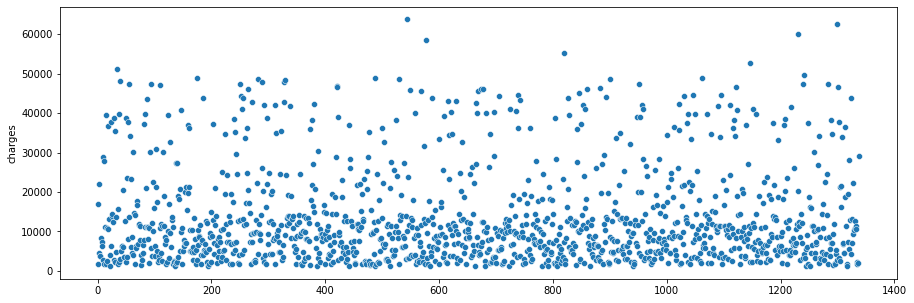

In [68]:
fig = plt.subplots(1,1,figsize = (15,5))
sns.scatterplot(data=df.charges)

In [84]:
X = df.drop(['charges'], axis = 1)
X.shape

(1338, 8)

In [85]:
y=df['charges']
y.shape

(1338,)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1046,43,25.080,0,0,0,0,0,0
682,39,35.300,2,1,1,0,0,1
1037,45,30.495,1,0,1,1,0,0
490,19,32.900,0,0,0,0,0,1
39,60,39.900,0,1,1,0,0,1


In [89]:
print(X_train.shape)
print()
print(y_train.shape)

(896, 8)

(896,)


In [90]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LinearRegression())])

In [91]:
pipeline_dt = Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier', DecisionTreeRegressor())])

In [92]:
pipeline_randomforest = Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier', RandomForestRegressor())])

In [93]:
pipeline_svr = Pipeline([('scalar4',StandardScaler()),
                     ('rf_classifier', SVR())])

In [94]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_svr]

In [95]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LinearRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('dt_classifier', DecisionTreeRegressor())]),
 Pipeline(steps=[('scalar3', StandardScaler()),
                 ('rf_classifier', RandomForestRegressor())]),
 Pipeline(steps=[('scalar4', StandardScaler()), ('rf_classifier', SVR())])]

In [96]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [97]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVR"}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [98]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy: 0.7605492639270064
Decision Tree Test Accuracy: 0.7147048465248802
RandomForest Test Accuracy: 0.8476438615207692
SVR Test Accuracy: -0.08003547300200942


In [99]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

Regressor with best accuracy:RandomForest


In [102]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")

In [104]:
# pipelines

In [105]:
# Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [108]:
# Create a pipeline
pipe = Pipeline([("regressor", RandomForestRegressor())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
              {"regressor": [RandomForestRegressor()],
                "regressor__n_estimators": [10, 100],
                "regressor__max_depth":[5,8,15,25,30,None],
                "regressor__min_samples_leaf":[1,2,5,10,15,100],
                "regressor__max_leaf_nodes": [2, 5,10]}
            ]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [110]:
print(best_model.best_estimator_)

Pipeline(steps=[('regressor',
                 RandomForestRegressor(max_depth=25, max_leaf_nodes=10,
                                       min_samples_leaf=10, n_estimators=10))])


In [111]:
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

The mean accuracy of the model is: 0.849717881318441


In [126]:
def MAPE(model):
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    mape_train = mean_absolute_percentage_error(y_train, pred_train)
    mape_test = mean_absolute_percentage_error(y_test, pred_test)

    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)
    
    
    return mape_train, mape_test, r2_train, r2_test


mape_train, mape_test, r2_train, r2_test = MAPE(best_model)

print(f"MAPE Train: {mape_train}")
print(f"MAPE Test:  {mape_test}")

print(f"R2 Train: {r2_train}")
print(f"R2 Test:  {r2_test}")

MAPE Train: 0.3121637763730651
MAPE Test:  0.3306106967130806
R2 Train: 0.8680323506682013
R2 Test:  0.849717881318441


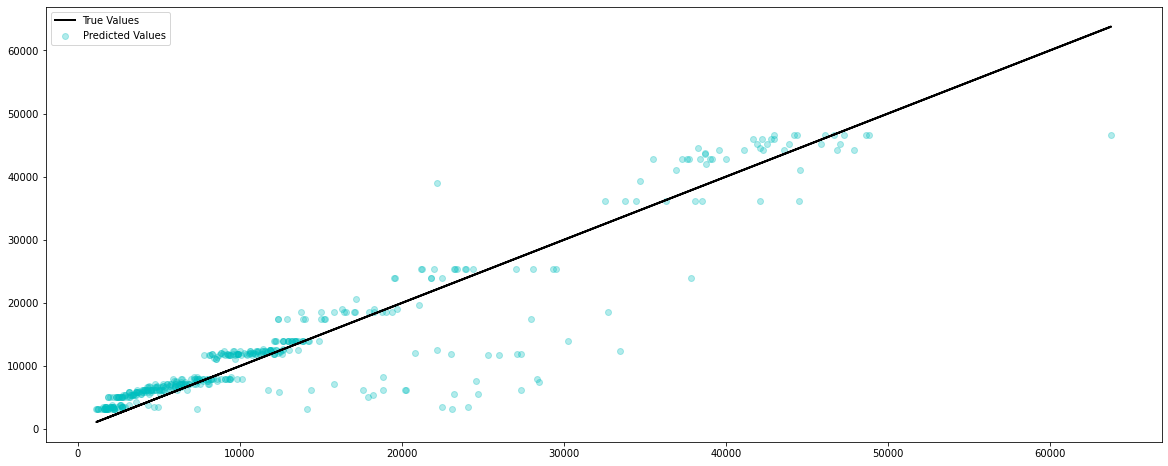

In [116]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(best_model, X_test, y_test, cv = 10, n_jobs = -1)
cv.mean()
y_pred = best_model.predict(X_test)


fig = plt.subplots(1,1,figsize = (20,8))

_ = plt.scatter(y_test, y_pred, c = "c", alpha = 0.3, label = "Predicted Values")
_ = plt.plot(y_test, y_test, c = "k", lw = 2, label = "True Values")
_ = plt.legend()

In [118]:
# Create a table for True Value and Predicted Values

df_test = pd.DataFrame({'True Values':y_test,'Predicted Values':y_pred})
df_test.sample(n = 10,random_state = 42)

,True Values,Predicted Values
1240,47269.85400,46631.462346
661,22192.43711,12563.499038
1280,8283.68070,11944.238405
1141,7954.51700,7632.479314
1143,6338.07560,7212.620420
274,2523.16950,5149.785401
59,5989.52365,6691.035307
558,39983.42595,42816.211095
199,14901.51670,13971.991377
1256,11436.73815,12335.931318


In [119]:
import statsmodels.api as sm
stat_multi_linear=sm.OLS(y_train,X_train)
stat_multi_linear_model=stat_multi_linear.fit()
stat_multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              758.2
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                        0.00
Time:                        07:55:10   Log-Likelihood:                         -9130.6
No. Observations:                 896   AIC:                                  1.828e+04
Df Residuals:                     888   BIC:                                  1.832e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                208.1790     14.358     14.500      0.000     180.000     236.358
bmi                 59.5783     23.269      2.560      0.011      13.910     105.247
children           174.9995    179.159      0.977      0.329    -176.626     526.625
sex_male          -514.4454    428.831     -1.200      0.231   -1356.086     327.195
smoker_yes        2.311e+04    529.721     43.631      0.000    2.21e+04    2.42e+04
region_northwest -1566.1258    593.696     -2.638      0.008   -2731.336    -400.916
region_southeast -1095.2565    625.069     -1.752      0.080   -2322.042     131.529
region_southwest -1549.6503    617.606     -2.509      0.012   -2761.788    -337.513
==============================================================================
Omnibus:                      198.177   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.541
Skew:                           1.179   Prob(JB):                    2.98e-102
Kurtosis:                       5.638   Cond. No.                         204.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
def get_scores(model):
    
    model_scores = {}

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    mape = mean_absolute_percentage_error(y_train, pred_train)
    r2 = r2_score(y_train, pred_train)
    model_scores = [mape, r2]
    
    print(f"MAPE: {mape}")
    print(f"R2: {r2}")
    
    pickle.dump(model_scores, open( "best_model_scores.p", "wb" ))

In [132]:
get_scores(best_model)

MAPE: 0.3121637763730651
R2: 0.8680323506682013


In [136]:
results_dict = pickle.load(open("best_model_scores.p", "rb"))

In [148]:
res_model = pd.DataFrame(results_dict)
res_model.columns = ['score']
res_model.index = ['MAPE', 'R2']
res_model

,score
MAPE,0.312164
R2,0.868032


In [149]:
res_pred = best_model.predict(X_train)

In [150]:
res_prediction = pd.DataFrame(res_pred, columns =['PredictedCharges'])
res_prediction

,PredictedCharges
0,7599.259395
1,43832.172555
2,44221.641517
3,3221.333129
4,46631.462346
...,...
891,3532.394653
892,7212.620420
893,12311.937232
894,45226.031924


In [155]:
age_df = X_train["age"]


submission = pd.concat([age_df, res_prediction],axis=1)
submission

,age,PredictedCharges
0,19.0,7599.259395
1,18.0,43832.172555
2,28.0,44221.641517
3,33.0,3221.333129
4,32.0,46631.462346
...,...,...
1332,52.0,NaN
1333,50.0,NaN
1335,18.0,NaN
1336,21.0,NaN


In [ ]:
# Plot confusion Metrix